In [202]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/formula-1-world-championship-1950-2020/races.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv
/kaggle/input/formula-1-world-championship-1950-2020/lap_times.csv
/kaggle/input/formula-1-world-championship-1950-2020/status.csv
/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/seasons.csv
/kaggle/input/formula-1-world-championship-1950-2020/pit_stops.csv
/kaggle/input/formula-1-world-championship-1950-2020/sprint_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/results.csv
/kaggle/input/formula-1-world-championship-1950-2020/circuits.csv
/kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv


Objetivos del estudio
- Cómo tener una carrera ganadora en un circuito de Fórmula 1? Qué dicen los datos al respecto?
    - Correlación entre qualy y carrera del circuito de ....


## 1. Limpieza de datos

### 1.1 Circuitos

In [69]:
df_circuits = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/circuits.csv')
df_circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB


In [70]:
df_circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [71]:
df_circuits.drop(columns = 'url', inplace = True)

In [72]:
mask_real_name = df_circuits['country'] == 'United States'
df_circuits.loc[mask_real_name, 'country'] = 'USA'

### 1.2 Resultados de constructor

In [73]:
df_const_res = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/constructor_results.csv')
df_const_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12290 entries, 0 to 12289
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12290 non-null  int64  
 1   raceId                12290 non-null  int64  
 2   constructorId         12290 non-null  int64  
 3   points                12290 non-null  float64
 4   status                12290 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 480.2+ KB


In [74]:
df_const_res.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [75]:
df_const_res['status'].value_counts()

status
\N    12273
D        17
Name: count, dtype: int64

### 1.3 Posiciones de los constructores

In [76]:
df_const_stand = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/constructor_standings.csv')
df_const_stand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13051 entries, 0 to 13050
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  13051 non-null  int64  
 1   raceId                  13051 non-null  int64  
 2   constructorId           13051 non-null  int64  
 3   points                  13051 non-null  float64
 4   position                13051 non-null  int64  
 5   positionText            13051 non-null  object 
 6   wins                    13051 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 713.9+ KB


In [77]:
df_const_stand.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


### 1.4 Constructores

In [78]:
df_const = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv')
df_const.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [79]:
df_const.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [80]:
df_const.drop(columns = 'url', inplace = True)

### 1.5 Posiciones de los pilotos

In [81]:
df_driver_stand = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv')
df_driver_stand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34124 entries, 0 to 34123
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  34124 non-null  int64  
 1   raceId             34124 non-null  int64  
 2   driverId           34124 non-null  int64  
 3   points             34124 non-null  float64
 4   position           34124 non-null  int64  
 5   positionText       34124 non-null  object 
 6   wins               34124 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


In [203]:
df_driver_stand.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


### 1.6 Pilotos

In [83]:
df_drivers = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv')
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


In [84]:
df_drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [85]:
df_drivers.drop(columns = 'url', inplace = True)

### 1.7 Tiempos de vuelta

In [86]:
df_lap = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/lap_times.csv')
df_lap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551742 entries, 0 to 551741
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        551742 non-null  int64 
 1   driverId      551742 non-null  int64 
 2   lap           551742 non-null  int64 
 3   position      551742 non-null  int64 
 4   time          551742 non-null  object
 5   milliseconds  551742 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 25.3+ MB


In [87]:
df_lap.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


### 1.8 Paradas

In [88]:
df_pits = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/pit_stops.csv')
df_pits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10089 entries, 0 to 10088
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        10089 non-null  int64 
 1   driverId      10089 non-null  int64 
 2   stop          10089 non-null  int64 
 3   lap           10089 non-null  int64 
 4   time          10089 non-null  object
 5   duration      10089 non-null  object
 6   milliseconds  10089 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 551.9+ KB


In [204]:
df_pits.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


### 1.9 Clasificación

In [90]:
df_qualy = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv')
df_qualy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9815 non-null   int64 
 1   raceId         9815 non-null   int64 
 2   driverId       9815 non-null   int64 
 3   constructorId  9815 non-null   int64 
 4   number         9815 non-null   int64 
 5   position       9815 non-null   int64 
 6   q1             9807 non-null   object
 7   q2             9651 non-null   object
 8   q3             9488 non-null   object
dtypes: int64(6), object(3)
memory usage: 690.2+ KB


In [91]:
df_qualy.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


### 1.10 Carreras

In [92]:
df_races = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/races.csv')
df_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1101 non-null   int64 
 1   year         1101 non-null   int64 
 2   round        1101 non-null   int64 
 3   circuitId    1101 non-null   int64 
 4   name         1101 non-null   object
 5   date         1101 non-null   object
 6   time         1101 non-null   object
 7   url          1101 non-null   object
 8   fp1_date     1101 non-null   object
 9   fp1_time     1101 non-null   object
 10  fp2_date     1101 non-null   object
 11  fp2_time     1101 non-null   object
 12  fp3_date     1101 non-null   object
 13  fp3_time     1101 non-null   object
 14  quali_date   1101 non-null   object
 15  quali_time   1101 non-null   object
 16  sprint_date  1101 non-null   object
 17  sprint_time  1101 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.0+ KB


In [205]:
df_races.head()

,raceId,year,round,circuitId,name,date,time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00


In [94]:
df_races['fp2_date'].value_counts()

fp2_date
\N            1035
2023-05-26       1
2022-08-26       1
2022-09-02       1
2022-09-09       1
              ... 
2022-05-20       1
2022-05-27       1
2022-06-10       1
2022-06-17       1
2023-11-24       1
Name: count, Length: 67, dtype: int64

In [95]:
df_races.drop(columns = ['url', 'fp1_date', 'fp1_time','fp2_date','fp2_time','fp2_date','fp3_time', 'fp3_date','quali_date','quali_time','sprint_date','sprint_time'], inplace = True)

### 1.11 Resultados

In [96]:
df_results = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/results.csv')
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

In [97]:
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


### 1.12 Temporadas

In [98]:
df_seasons = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/seasons.csv')
df_seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    74 non-null     int64 
 1   url     74 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [99]:
df_seasons.head()

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


In [100]:
df_seasons.drop(columns = 'url')

,year
0,2009
1,2008
2,2007
3,2006
4,2005
...,...
69,2019
70,2020
71,2021
72,2022


### 1.13 Resultados de la carrera Sprint

In [101]:
df_sprint = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/sprint_results.csv')
df_sprint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   resultId        180 non-null    int64 
 1   raceId          180 non-null    int64 
 2   driverId        180 non-null    int64 
 3   constructorId   180 non-null    int64 
 4   number          180 non-null    int64 
 5   grid            180 non-null    int64 
 6   position        180 non-null    object
 7   positionText    180 non-null    object
 8   positionOrder   180 non-null    int64 
 9   points          180 non-null    int64 
 10  laps            180 non-null    int64 
 11  time            180 non-null    object
 12  milliseconds    180 non-null    object
 13  fastestLap      180 non-null    object
 14  fastestLapTime  180 non-null    object
 15  statusId        180 non-null    int64 
dtypes: int64(10), object(6)
memory usage: 22.6+ KB


In [102]:
df_sprint.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


### 1.14 Estado

In [103]:
df_status = pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/status.csv')
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [104]:
df_status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


# 2. Introducción

### Cúantos equipos costructores diferentes han participado en Fórmula 1?

In [123]:
df_const['constructorRef'].nunique()

211

### Cúantos equipos constructores diferentes han ganado una temporada de Fórmula 1 y cuántos ha ganado cada uno?

In [127]:
df_const_champs = df_const_stand.merge(df_races, on = 'raceId', how = 'left')
df_const_champs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13051 entries, 0 to 13050
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  13051 non-null  int64  
 1   raceId                  13051 non-null  int64  
 2   constructorId           13051 non-null  int64  
 3   points                  13051 non-null  float64
 4   position                13051 non-null  int64  
 5   positionText            13051 non-null  object 
 6   wins                    13051 non-null  int64  
 7   year                    13051 non-null  int64  
 8   round                   13051 non-null  int64  
 9   circuitId               13051 non-null  int64  
 10  name                    13051 non-null  object 
 11  date                    13051 non-null  object 
 12  time                    13051 non-null  object 
dtypes: float64(1), int64(8), object(4)
memory usage: 1.3+ MB


In [189]:
df_const_champs.drop(columns = ['constructorStandingsId', 'raceId',
       'position', 'positionText', 'wins', 'round', 'circuitId',
       'name', 'date', 'time'], inplace = True)

In [199]:
g_const_champs = df_const_champs.groupby(['year'])
aux = g_const_champs.apply(lambda x: x.loc[x['points'].idxmax()])

/tmp/ipykernel_33/2823154525.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aux = g_const_champs.apply(lambda x: x.loc[x['points'].idxmax()])


In [200]:
const_champs = aux.merge(df_const[['constructorId', 'name']], on = 'constructorId', how = 'left')

In [220]:
print(const_champs['name'].nunique(), 'equipos constructores han ganado un campeonato de F1')

17 equipos constructores han ganado un campeonato de F1


### Equipos más ganadores

<Axes: xlabel='name'>

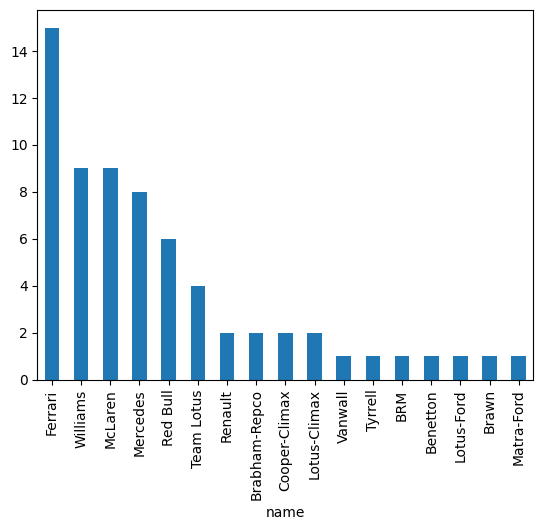

In [236]:
const_champs.groupby('name')['year'].count().sort_values(ascending = False).plot.bar()

### Pilotos más ganadores

In [245]:
df_driver_champs = df_driver_stand.merge(df_races[['raceId','year']], on = 'raceId', how = 'left')
df_driver_champs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34124 entries, 0 to 34123
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  34124 non-null  int64  
 1   raceId             34124 non-null  int64  
 2   driverId           34124 non-null  int64  
 3   points             34124 non-null  float64
 4   position           34124 non-null  int64  
 5   positionText       34124 non-null  object 
 6   wins               34124 non-null  int64  
 7   year               34124 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 2.1+ MB


In [246]:
g_driver_champs = df_driver_champs.groupby(['year'])
aux = g_driver_champs.apply(lambda x: x.loc[x['points'].idxmax()])

/tmp/ipykernel_33/2768440702.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aux = g_driver_champs.apply(lambda x: x.loc[x['points'].idxmax()])


In [247]:
driver_champs = aux.merge(df_drivers[['driverId', 'code', 'forename', 'surname']], on = 'driverId', how = 'left')

<Axes: xlabel='surname'>

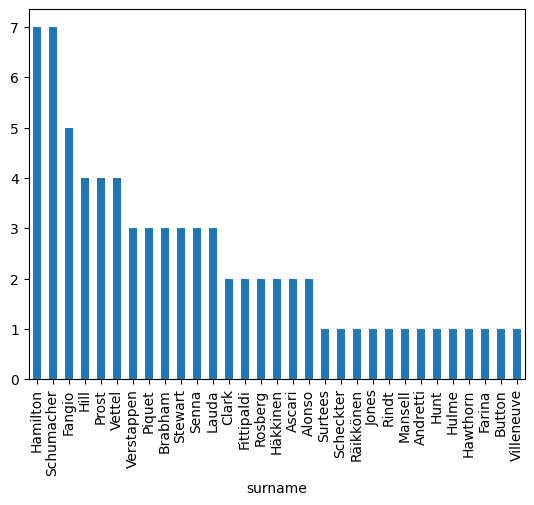

In [251]:
driver_champs.groupby('surname')['year'].count().sort_values(ascending = False).plot.bar()

### Vueltas rápidas

### Carreras que acabaron todos los pilotos

### Carreras con más accidentes

### 2. Tablas de consulta

### 2.1 Correlación entre qualy y carrera

In [105]:
df_races.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time'], dtype='object')

In [106]:
df_corr_qly_race = df_qualy.merge(df_races, on = 'raceId', how = 'left', validate = 'm:1')

In [107]:
df_corr_qly_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9815 non-null   int64 
 1   raceId         9815 non-null   int64 
 2   driverId       9815 non-null   int64 
 3   constructorId  9815 non-null   int64 
 4   number         9815 non-null   int64 
 5   position       9815 non-null   int64 
 6   q1             9807 non-null   object
 7   q2             9651 non-null   object
 8   q3             9488 non-null   object
 9   year           9815 non-null   int64 
 10  round          9815 non-null   int64 
 11  circuitId      9815 non-null   int64 
 12  name           9815 non-null   object
 13  date           9815 non-null   object
 14  time           9815 non-null   object
dtypes: int64(9), object(6)
memory usage: 1.1+ MB


In [108]:
df_corr_qly_race.merge(df_drivers, on = 'driverId', how = 'left', validate = 'm:1')

,qualifyId,raceId,driverId,constructorId,number_x,position,q1,q2,q3,year,...,name,date,time,driverRef,number_y,code,forename,surname,dob,nationality
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714,2008,...,Australian Grand Prix,2008-03-16,04:30:00,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869,2008,...,Australian Grand Prix,2008-03-16,04:30:00,kubica,88,KUB,Robert,Kubica,1984-12-07,Polish
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079,2008,...,Australian Grand Prix,2008-03-16,04:30:00,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178,2008,...,Australian Grand Prix,2008-03-16,04:30:00,massa,19,MAS,Felipe,Massa,1981-04-25,Brazilian
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236,2008,...,Australian Grand Prix,2008-03-16,04:30:00,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9810,9868,1110,848,3,23,16,2:00.314,\N,\N,2023,...,Belgian Grand Prix,2023-07-30,13:00:00,albon,23,ALB,Alexander,Albon,1996-03-23,Thai
9811,9869,1110,855,51,24,17,2:00.832,\N,\N,2023,...,Belgian Grand Prix,2023-07-30,13:00:00,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese
9812,9870,1110,858,3,2,18,2:01.535,\N,\N,2023,...,Belgian Grand Prix,2023-07-30,13:00:00,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American
9813,9871,1110,817,213,3,19,2:02.159,\N,\N,2023,...,Belgian Grand Prix,2023-07-30,13:00:00,ricciardo,3,RIC,Daniel,Ricciardo,1989-07-01,Australian


In [109]:
df_corr_qly_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9815 non-null   int64 
 1   raceId         9815 non-null   int64 
 2   driverId       9815 non-null   int64 
 3   constructorId  9815 non-null   int64 
 4   number         9815 non-null   int64 
 5   position       9815 non-null   int64 
 6   q1             9807 non-null   object
 7   q2             9651 non-null   object
 8   q3             9488 non-null   object
 9   year           9815 non-null   int64 
 10  round          9815 non-null   int64 
 11  circuitId      9815 non-null   int64 
 12  name           9815 non-null   object
 13  date           9815 non-null   object
 14  time           9815 non-null   object
dtypes: int64(9), object(6)
memory usage: 1.1+ MB


In [110]:
df_corr_qly_race.merge(df_const, on = 'constructorId', how = 'left', validate = 'm:1')

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,year,round,circuitId,name_x,date,time,constructorRef,name_y,nationality
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,mclaren,McLaren,British
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,bmw_sauber,BMW Sauber,German
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,mclaren,McLaren,British
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,ferrari,Ferrari,Italian
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,bmw_sauber,BMW Sauber,German
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9810,9868,1110,848,3,23,16,2:00.314,\N,\N,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00,williams,Williams,British
9811,9869,1110,855,51,24,17,2:00.832,\N,\N,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00,alfa,Alfa Romeo,Swiss
9812,9870,1110,858,3,2,18,2:01.535,\N,\N,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00,williams,Williams,British
9813,9871,1110,817,213,3,19,2:02.159,\N,\N,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00,alphatauri,AlphaTauri,Italian


In [111]:
df_corr_qly_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9815 non-null   int64 
 1   raceId         9815 non-null   int64 
 2   driverId       9815 non-null   int64 
 3   constructorId  9815 non-null   int64 
 4   number         9815 non-null   int64 
 5   position       9815 non-null   int64 
 6   q1             9807 non-null   object
 7   q2             9651 non-null   object
 8   q3             9488 non-null   object
 9   year           9815 non-null   int64 
 10  round          9815 non-null   int64 
 11  circuitId      9815 non-null   int64 
 12  name           9815 non-null   object
 13  date           9815 non-null   object
 14  time           9815 non-null   object
dtypes: int64(9), object(6)
memory usage: 1.1+ MB


In [112]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

In [113]:
mask = df_results['position'] != '\\N'
df_corr_grid_race = df_results[mask]

In [114]:
df_corr_grid_race.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

In [115]:
df_corr_grid_race.drop(columns = ['resultId',
       'position', 'positionText', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'], inplace = True )

/tmp/ipykernel_33/2787956065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr_grid_race.drop(columns = ['resultId',


In [116]:
df_corr_grid_race.corr(method='pearson', min_periods=1, numeric_only=False)

,raceId,driverId,constructorId,number,grid,positionOrder
raceId,1.000000,0.711486,0.416800,0.304978,-0.018629,0.105056
driverId,0.711486,1.000000,0.275222,0.350763,0.088629,0.201155
constructorId,0.416800,0.275222,1.000000,0.194275,0.153053,0.186151
number,0.304978,0.350763,0.194275,1.000000,0.195548,0.208491
grid,-0.018629,0.088629,0.153053,0.195548,1.000000,0.641002
positionOrder,0.105056,0.201155,0.186151,0.208491,0.641002,1.000000


In [117]:
df_corr_grid_race.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15207 entries, 0 to 26077
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   raceId         15207 non-null  int64 
 1   driverId       15207 non-null  int64 
 2   constructorId  15207 non-null  int64 
 3   number         15207 non-null  object
 4   grid           15207 non-null  int64 
 5   positionOrder  15207 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 831.6+ KB


### 2.2 Análisis de retiros de carreras

### 2.3 Estrategia de paradas de acuerdo a la pista